# Start of the analysis notebook

**Author : Inga Ulusoy**  
*Date : March 2021*  
*Affiliation : SSC*  

Place the required modules in the top, followed by required constants and global functions.

In [1]:
# required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
# constants and global functions
# a tuple containing the file names
filenames = 'npop.t', 'efield.t', 'expec.t', 'table.dat', 'nstate_i.t'
filedir = '/home/jing/course/team13/data/'# if you run using jupyter
# filedir = 'data/' # if you run using your IDE
# variance threshold
threshv = 1.0e-5

In [3]:
def read_in_df(filedir, filename):
    name = '{}{}'.format(filedir, filename)
    print('Reading from file {} - pandas'.format(name))
    data = pd.read_csv(name, r'\s+')
    return data
def read_in_np(filedir, filename):
    name = '{}{}'.format(filedir, filename)
    print('Reading from file {} - numpy'.format(name))
    data = np.loadtxt(name, skiprows=1)
    data = data.T
    return data

# Statistical analysis

Find correlations in the data sets. Analyse the data statistically and plot your results.  

Here we would want to do everything with pandas and leave the data in a dataframe. The files that are relevant to you are `expect.t`, `npop.t` and `table.dat`.

### Task 1: Read in expect.t and plot relevant data

In [4]:
df_expec = read_in_df(filedir, filenames[2])
df_expec.head(10)

Reading from file /home/jing/course/team13/data/expec.t - pandas


,time,norm,<x>,<y>,<z>,<H>
0,0.0,1.0,0.0,0.0,-2.19632,0.0
1,0.1,1.0,0.0,0.0,-2.19632,0.0
2,0.2,1.0,-0.0,0.0,-2.19632,0.0
3,0.3,1.0,-0.0,0.0,-2.19632,0.0
4,0.4,1.0,-0.0,0.0,-2.19632,0.0
5,0.5,1.0,-0.0,0.0,-2.19632,0.0
6,0.6,1.0,0.0,-0.0,-2.19632,0.0
7,0.7,1.0,-0.0,-0.0,-2.19632,0.0
8,0.8,1.0,-0.0,-0.0,-2.19632,0.0
9,0.9,1.0,-0.0,-0.0,-2.19632,0.0


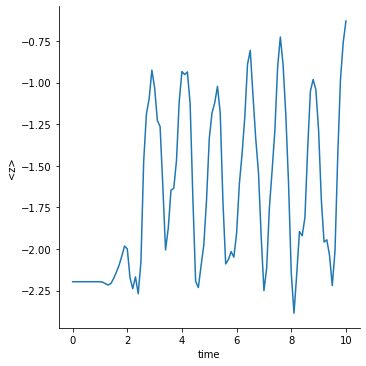

In [5]:
sn.relplot(data=df_expec, kind='line', x='time', y='<z>')
plt.show()

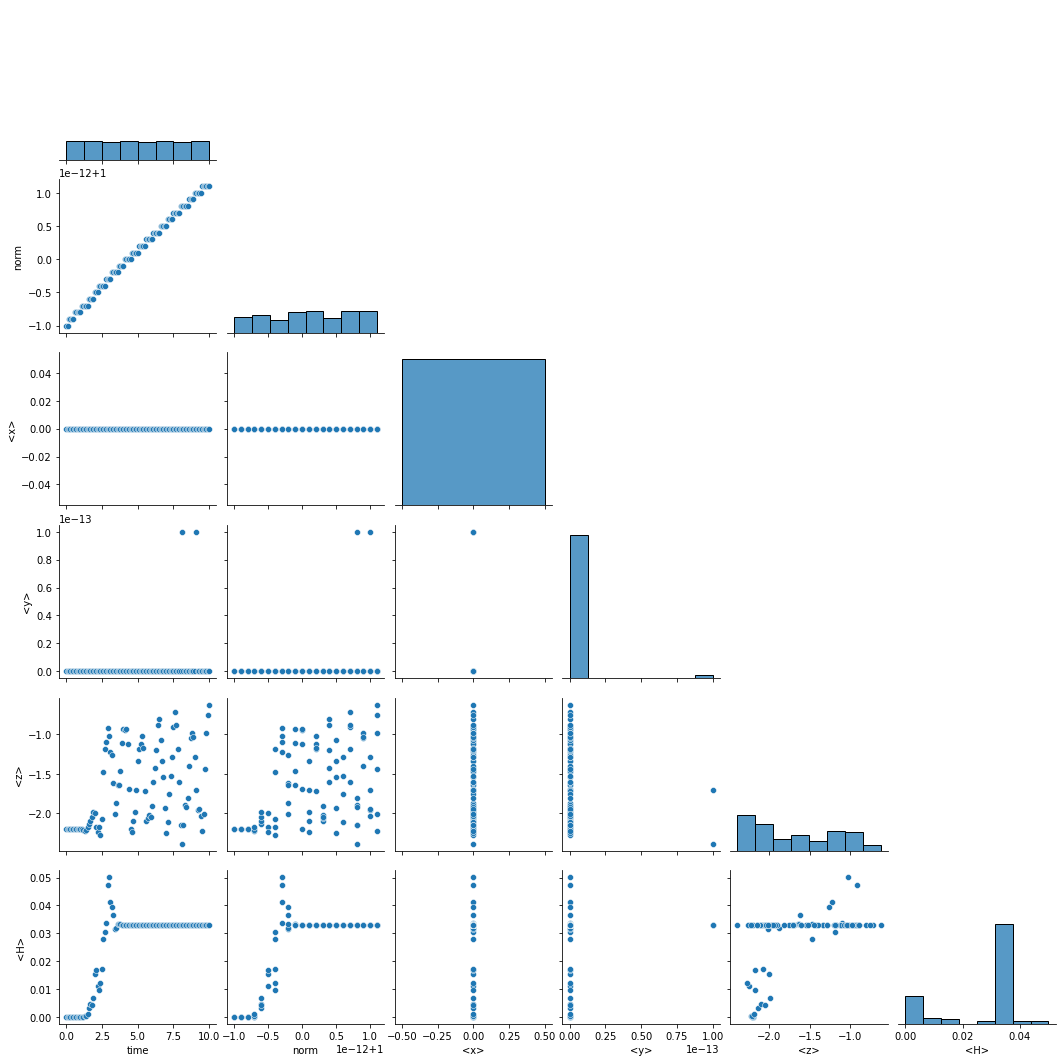

In [6]:
sn.pairplot(df_expec, corner=True)
plt.show()

We can discard the entries norm, \<x>, and \<y> as these are mostly constant.

In [ ]:
df_expec.drop(['norm', '<x>', '<y>'], axis=1)

In [ ]:
df_expec.var()

In [ ]:
# df_expec.drop(df_expec.var()[df_expec.var()<threshv].index.values, axis=1)
# print(df_expec.var()<threshv) # this will return columns with variance below the threshold
# df_expec.var()[df_expec.var()<threshv].index # this will return the index of those columns 
# df_expec.var()[df_expec.var()<threshv].index.values # this will return the index of those columns in an array
# df_expec.drop(df_expec.var()[df_expec.var()<threshv].index.values) # we want to drop those columns
df_expec.drop(df_expec.var()[df_expec.var()<threshv].index.values, axis=1) # but we have to pick the right axis (columns, not rows)

In [7]:
def check_if_significant(data, thresh):
    data_out = data.drop(data.var()[data.var()<thresh].index.values, axis=1)
    indices = data.var()[data.var() > thresh].index.values
    return data_out, indices

In [8]:
df_expec2, indices = check_if_significant(df_expec, threshv)
display(df_expec2.head())
print(indices)

,time,<z>,<H>
0,0.0,-2.19632,0.0
1,0.1,-2.19632,0.0
2,0.2,-2.19632,0.0
3,0.3,-2.19632,0.0
4,0.4,-2.19632,0.0


['time' '<z>' '<H>']


### Task 2: Create plots of the relevant data and save as .pdf.

In [ ]:
# I will leave this up to you.

### Task 3: Read in file `npop.t` and analyze correlations in the data

In [9]:
df_npop = read_in_df(filedir, filenames[0])
df_npop.head(10)

Reading from file /home/jing/course/team13/data/npop.t - pandas


,time,MO1,MO2,MO3,MO4,MO5,MO6,MO7,MO8,MO9,...,MO29,MO30,MO31,MO32,MO33,MO34,MO35,MO36,MO37,MO38
0,0.0,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
1,0.1,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
2,0.2,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
3,0.3,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
4,0.4,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
5,0.5,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
6,0.6,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
7,0.7,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
8,0.8,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128
9,0.9,0.999974,0.999892,0.976819,0.97633,0.000708,0.005711,0.000158,0.00092,0.000158,...,0.000815,0.000514,0.004893,0.001388,0.000469,0.000193,0.000469,0.000193,0.000401,0.000128


In [10]:
df_npop2, indices_npop = check_if_significant(df_npop, threshv)
display(df_npop2.head())
print(indices_npop)

,time,MO3,MO4,MO6,MO11,MO12,MO14
0,0.0,0.976819,0.97633,0.005711,0.004568,0.006659,0.000107
1,0.1,0.976819,0.97633,0.005711,0.004568,0.006659,0.000107
2,0.2,0.976819,0.97633,0.005711,0.004568,0.006659,0.000107
3,0.3,0.976819,0.97633,0.005711,0.004568,0.006659,0.000107
4,0.4,0.976819,0.97633,0.005711,0.004568,0.006659,0.000107


['time' 'MO3' 'MO4' 'MO6' 'MO11' 'MO12' 'MO14']


Plot the remaining columns. Seaborn prefers "long format" (one column for all measurement values, one column to indicate the type) as input, whereas the cvs is in "wide format" (one column per measurement type).

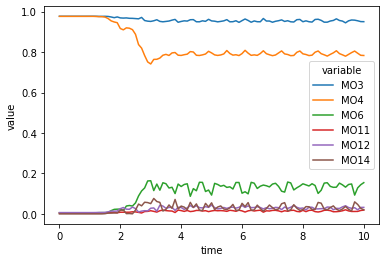

In [11]:
sn.lineplot(x='time', y='value', hue='variable', 
             data=pd.melt(df_npop2, ['time'])) 
# Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
plt.show()

## Quantify the pairwise correlation in the data

- negative correlation: y values decrease for increasing x - large values of one feature correspond to small values of the other feature
- weak or no correlation: no trend observable, association between two features is hardly observable
- positive correlation: y values increase for decreasing x - small values of one feature correspond to small values of the other feature

Remember that correlation does not indicate causation - the reason that two features are associated can lie in their dependence on same factors.

Correlate the value pairs using Pearson's $r$. Pearson's $r$ is a measure of the linear relationship between features:

$r = \frac{\sum_i(x_i − \bar{x})(y_i − \bar{y})}{\sqrt{\sum_i(x_i − \bar{x})^2 \sum_i(y_i − \bar{y})^2}}$

Here, $\bar{x}$ and $\bar{y}$ indicate mean values. $i$ runs over the whole data set. For a positive correlation, $r$ is positive, and negative for a negative correlation, with minimum and maximum values of -1 and 1, indicating a perfectly linear relationship. Weakly or not correlated features are characterized by $r$-values close to 0.

Other measures of correlation that can be used are Spearman's rank (value pairs follow monotonic function) or Kendall's $\tau$ (measures ordinal association), but they do not apply here. You can also define measures yourself.

In [15]:
print("Correlation Matrix")
print(df_npop2.corr())

Correlation Matrix
          time       MO3       MO4       MO6      MO11      MO12      MO14
time  1.000000 -0.714730 -0.740092  0.753839  0.675510  0.633522  0.412123
MO3  -0.714730  1.000000  0.926317 -0.907659 -0.966070 -0.818545 -0.590497
MO4  -0.740092  0.926317  1.000000 -0.964051 -0.844402 -0.782851 -0.726726
MO6   0.753839 -0.907659 -0.964051  1.000000  0.841446  0.699677  0.538846
MO11  0.675510 -0.966070 -0.844402  0.841446  1.000000  0.855583  0.447701
MO12  0.633522 -0.818545 -0.782851  0.699677  0.855583  1.000000  0.514489
MO14  0.412123 -0.590497 -0.726726  0.538846  0.447701  0.514489  1.000000


This tells us that each value is perfectly correlated with itself. We are not interested in the diagonal values and also not in the correlation with time. We also need to get rid of redundant entries. Finally, we need to find the value pairs that exhibit the highest linear correlation. We still want to know if it is positive or negative correlation, so we cannot get rid of the sign.

In [12]:
def get_correlation_measure(df):
    drop_values = set() # an unordered collection of items
    cols = df.columns # get the column labels
    print(cols)
    for i in range(0, df.shape[1]):
        for j in range(0, i+1): # get rid of all diagonal entries and the lower triangular
            drop_values.add((cols[i], cols[j]))
    print(drop_values)
    return drop_values
df_npop2_short = df_npop2.drop(["time"], axis = 1) # get rid of time column
drop_vals = get_correlation_measure(df_npop2_short) # get rid of lower triangular and diagonal entries
corr2 = df_npop2_short.corr().unstack() # pivot the correlation matrix
corr2 = corr2.drop(labels=drop_vals).sort_values(ascending=False, key=lambda col: col.abs()) # sort by absolute values but keep sign
display(corr2)                                    

Index(['MO3', 'MO4', 'MO6', 'MO11', 'MO12', 'MO14'], dtype='object')
{('MO4', 'MO3'), ('MO11', 'MO6'), ('MO6', 'MO3'), ('MO14', 'MO6'), ('MO12', 'MO12'), ('MO11', 'MO3'), ('MO12', 'MO4'), ('MO14', 'MO3'), ('MO4', 'MO4'), ('MO6', 'MO4'), ('MO12', 'MO11'), ('MO14', 'MO14'), ('MO3', 'MO3'), ('MO11', 'MO4'), ('MO12', 'MO6'), ('MO6', 'MO6'), ('MO14', 'MO12'), ('MO11', 'MO11'), ('MO14', 'MO4'), ('MO14', 'MO11'), ('MO12', 'MO3')}


MO3   MO11   -0.966070
MO4   MO6    -0.964051
MO3   MO4     0.926317
      MO6    -0.907659
MO11  MO12    0.855583
MO4   MO11   -0.844402
MO6   MO11    0.841446
MO3   MO12   -0.818545
MO4   MO12   -0.782851
      MO14   -0.726726
MO6   MO12    0.699677
MO3   MO14   -0.590497
MO6   MO14    0.538846
MO12  MO14    0.514489
MO11  MO14    0.447701
dtype: float64

In [13]:
drop_vals

{('MO11', 'MO11'),
 ('MO11', 'MO3'),
 ('MO11', 'MO4'),
 ('MO11', 'MO6'),
 ('MO12', 'MO11'),
 ('MO12', 'MO12'),
 ('MO12', 'MO3'),
 ('MO12', 'MO4'),
 ('MO12', 'MO6'),
 ('MO14', 'MO11'),
 ('MO14', 'MO12'),
 ('MO14', 'MO14'),
 ('MO14', 'MO3'),
 ('MO14', 'MO4'),
 ('MO14', 'MO6'),
 ('MO3', 'MO3'),
 ('MO4', 'MO3'),
 ('MO4', 'MO4'),
 ('MO6', 'MO3'),
 ('MO6', 'MO4'),
 ('MO6', 'MO6')}

Note that the entries in the left column are not repeated if they do not change from the row above (so the fourth feature pair is MO3 and MO6).

### Task 4: Generate graphs of the relevant data and save as .pdf.

### Task 5: Calculate the Euclidean distance (L2 norm) for the vectors in `table.dat`

In [ ]:
values = read_in_np(filedir, filenames[3])

In [ ]:
# no need for the first two columns, and replace the NaNs by zero
# table_vals = np.delete(values,[0,1],axis=0)
table_vals = np.nan_to_num(values)

Now calculate how different the vectors in column 2 are from column 3, column 4 from column 5, and column 6 from column 7.

In [ ]:
def euclidean_distance(list_ref, list_comp, vectors):
    distances = np.zeros(len(list_ref))
    for i in range(len(list_ref)):
        distances[i] = np.linalg.norm(vectors[list_comp[i]] - vectors[list_ref[i]])
    return distances

In [ ]:
out_dist = euclidean_distance([2,4,6],[3,5,7],table_vals)
print(out_dist)
x = range(0,len(out_dist))
plt.bar(x,out_dist)
plt.xticks(x, ('x', 'y', 'z'))
plt.show()

# Numerical analysis

Analyze the data using autocorrelation functions and discrete Fourier transforms. Plot your results.

In [ ]:
def read_in_np(filedir, filename):
    name = '{}{}'.format(filedir, filename)
    print('Reading from file {} - numpy'.format(name))
    data = np.loadtxt(name, skiprows=1)
    data = data.T
    return data

In [ ]:
def plot_columns(data):
    for i in range(1,len(data)):
        plt.plot(data[0], data[i])
        plt.title('Column {}'.format(i))
        plt.show()

### Task 1: Read in `efield.t` and Fourier-transform relevant columns

In [ ]:
efield = read_in_np(filedir, filenames[1])
plot_columns(efield)

Here we are interested in column 2 since the others are constant.

In [ ]:
# print(np.var(efield)) # var computed for the overall, flattened array
# print(np.var(efield, axis=1)) # var computed for each column (row-major order)
# print(np.nonzero(np.var(efield, axis=1) > threshv)) # returns the indices of values for which condition applies
print(efield[np.nonzero(np.var(efield, axis=1) > threshv)]) # get the numpy array for those indices

In [ ]:
def check_if_significant_np(data, thresh):
    indices = np.nonzero(np.var(efield, axis=1) > thresh)
    data_out = data[indices]
    return data_out, indices

In [ ]:
efield2, indices = check_if_significant_np(efield, threshv)
plot_columns(efield2)

In [ ]:
# do the FT
def do_DFT(data, tmax):
    data_s = np.fft.rfft(data)
    data_w = np.fft.rfftfreq(tmax)
    return data_s, data_w

In [ ]:
print(len(efield2[0]))
efield_s, frequency = do_DFT(efield2[1], len(efield2[0]))
plt.plot(frequency, abs(efield_s)**2) # the frequency of this laser pulse was 0.116
plt.show()

### Task 2: Generate a plot of your results to be saved as pdf.

### Task 3: Calculate the autocorrelation function from nstate_i.t

In [ ]:
wavef = read_in_np(filedir, filenames[4],)

In [ ]:
time = wavef[0]
wavef = np.delete(wavef,[0],axis=0)
print(wavef[0])

In [ ]:
# convert to complex array
realpart = wavef[0::2]
imagpart = wavef[1::2]
wavefc = realpart + 1j*imagpart
print(wavefc[0])
print(realpart[0])
print(imagpart[0])

In [ ]:
# Now construct overlap between first vector and all others
def calc_auto(wavef):
    aucofu = np.zeros(len(wavef[0]),dtype = complex)
    for i in range(0,len(wavef[0])):
        aucofu[i] = np.sum(wavef[:,0]*np.conjugate(wavef[:,i]))
    return aucofu

In [ ]:
aucofu = calc_auto(wavefc)
print(aucofu)
plt.plot(abs(aucofu**2))
plt.show()

### Task 4: Generate a plot of your results to be saved as pdf.

### Task 5: Discrete Fourier transform of the autocorrelation function

In [ ]:
# now do the FT
# do the FT - see https://numpy.org/doc/stable/reference/routines.fft.html
def do_fft(data,tmax):
    data_s = np.fft.fft(data)
    data_w = np.fft.fftfreq(tmax)
    # only take the positive frequency components
    return data_w[0:tmax//2], data_s[0:tmax//2] 

energy, spec = do_fft(aucofu,len(time))
print(energy)

### Task 6: Generate a plot of your results to be saved as pdf.

In [ ]:
#plt.plot(energy,real(spec))
#plt.plot(energy,imag(spec))
#plt.plot(energy,abs(spec))
plt.plot(energy,abs(spec)**2)
plt.ylim(-0.1,15)